/tmp/ipython-input-1-2407722113.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig("trajectory_with_drag.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


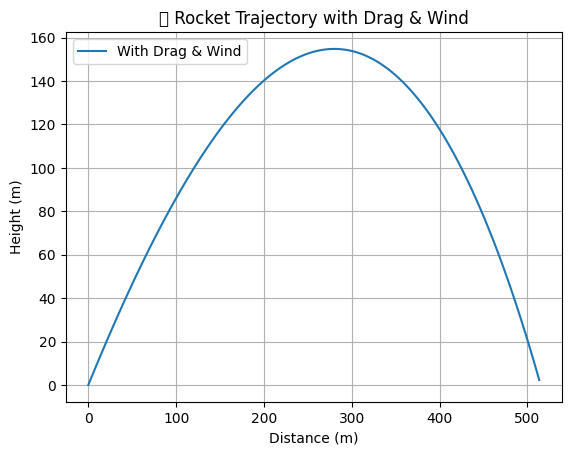

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravity (m/s^2)
rho = 1.225  # air density (kg/m³)
Cd = 0.5  # drag coefficient (typical for rocket)
A = 0.3   # cross-sectional area (m²)
m = 50    # mass of rocket (kg)
wind_speed = 10  # m/s wind pushing backward (relative to rocket)

# Initial conditions
v0 = 100
angle = 45
vx = v0 * np.cos(np.radians(angle))
vy = v0 * np.sin(np.radians(angle))

# Time setup
dt = 0.1
t_max = 30
n = int(t_max / dt)
x = np.zeros(n)
y = np.zeros(n)
vx_arr = np.zeros(n)
vy_arr = np.zeros(n)

x[0] = 0
y[0] = 0
vx_arr[0] = vx
vy_arr[0] = vy

for i in range(1, n):
    v_rel_x = vx_arr[i-1] - wind_speed
    v_rel_y = vy_arr[i-1]
    v_rel = np.sqrt(v_rel_x**2 + v_rel_y**2)
    F_drag = 0.5 * Cd * rho * A * v_rel**2

    # Drag components
    F_dx = -F_drag * (v_rel_x / v_rel)
    F_dy = -F_drag * (v_rel_y / v_rel)

    ax = F_dx / m
    ay = (F_dy / m) - g

    # Update velocities
    vx_arr[i] = vx_arr[i-1] + ax * dt
    vy_arr[i] = vy_arr[i-1] + ay * dt

    # Update positions
    x[i] = x[i-1] + vx_arr[i] * dt
    y[i] = y[i-1] + vy_arr[i] * dt

    # Stop when rocket hits ground
    if y[i] < 0:
        x = x[:i]
        y = y[:i]
        break

# Plot
plt.figure()
plt.plot(x, y, label="With Drag & Wind")
plt.title("🚀 Rocket Trajectory with Drag & Wind")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.grid(True)
plt.legend()
plt.savefig("trajectory_with_drag.png")
plt.show()
